## Clusters por Kmeans en CRM 2019 con RFM

Para iniciar a calcular los clusters de clientes primero obtendremos los indicadores de marketing llamados **RFM** el cual obtiene de un cierto periodo de ventas la información de cada usuario como: 

- Ultima Fecha de compra
- Número de compras en el periodo
- Total Monto de compra

De acuerdo con estos resultados se procede a clasificar a los clientes, pero para nosostros sólo nos bastará con saber estos tres indicadores para clasificarlos por Kmeans.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [2]:
base  = pd.read_excel('ClusterCRM.xlsx')

base= base.drop("nombre",axis=1)
base= base.drop("apellido_paterno",axis=1)
base= base.drop("correo",axis=1)
base= base.drop("celular",axis=1)
base= base.drop("sucursal",axis=1)
base= base.drop("Familia",axis=1)
base= base.drop("Colección",axis=1)


In [3]:
base['Fecha']=pd.to_datetime(base['Fecha'],format="%Y-%m-%d")

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9448 entries, 0 to 9447
Data columns (total 4 columns):
id_cc     9448 non-null object
Fecha     9448 non-null datetime64[ns]
Unids.    9448 non-null int64
Imp $     9448 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 295.3+ KB


In [5]:
FechaMax = base['Fecha'].max()

In [6]:
FechaMax

Timestamp('2019-09-29 00:00:00')

### Para este fin tendremos que almacenar los resultados en un diccionario

In [7]:
RFM = pd.DataFrame()

### Insertar ID del cliente en el DF

In [8]:
# Cargar catálogo de clientes

RFM['id_cc']=base['id_cc'].unique()

In [9]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 1 columns):
id_cc    4120 non-null object
dtypes: object(1)
memory usage: 32.3+ KB


#### Obtener la máxima Fecha de compra de cada uno de los clientes, insertarla y obtener la diferencia de días contra la máxima fecha general.

In [10]:
fechas = base.groupby(['id_cc'])['Fecha'].max().reset_index()

In [11]:
fechas.rename(columns = {'Fecha': 'Fecha_Max'},inplace=True)

In [12]:
RFM2 = pd.merge(RFM,fechas, on='id_cc',how='outer')

### Obtener el número de visitas en el periodo

In [13]:
num_compras = base.groupby(['id_cc'])['Fecha'].nunique().reset_index()

In [14]:
num_compras.rename(columns = {'Fecha': 'Frecuencia'},inplace=True)

In [15]:
num_compras.head()

id_cc  Frecuencia
0  .pablo.freyssinier@gmail.com           1
1                    0122222110           1
2                    0153610830           1
3                    0153732657           1
4                    0155533371           1

In [16]:
RFM3 = pd.merge(RFM2,num_compras, on='id_cc')

In [17]:
RFM3.head()

id_cc  Fecha_Max  Frecuencia
0    38380662 2019-04-18           1
1  0122222110 2019-03-22           1
2  0153610830 2019-06-07           1
3  0153732657 2019-07-12           1
4  0155533371 2019-06-09           1

### Sumar el monto total de la venta

In [18]:
monto = base.groupby(['id_cc'])['Imp $'].sum().reset_index()

In [19]:
RFM4 = pd.merge(RFM3,monto, on='id_cc')

In [20]:
RFM4['Dias'] = FechaMax - RFM4['Fecha_Max']

In [21]:
RFM4['Dias']=RFM4['Dias'].astype('timedelta64[D]')

In [22]:
RFM4[RFM4['Frecuencia']>1]

id_cc  Fecha_Max  Frecuencia     Imp $   Dias
16                      2225646701 2019-01-09           2  19881.03  263.0
61                      3313293795 2019-01-06           2  15465.51  266.0
73                      3314105854 2019-07-16           3  23353.46   75.0
170                     3331290540 2019-06-04           2   3767.25  117.0
175                     3331375095 2019-06-14           2  42596.54  107.0
211                     3335763348 2019-04-17           2  13086.20  165.0
220                     3336338377 2019-06-18           2  16002.59  103.0
221                     3336406323 2019-03-21           2  44352.65  192.0
273                     3339562374 2019-03-29           4  13061.55  184.0
334                     4421390591 2019-04-18           2  13694.84  164.0
398                     4423226014 2019-02-03           2   3964.65  238.0
494                     4521432425 2019-06-28           2  11180.17   93.0
545                     4772010250 2019-08-02           3   9676.73   58.0
549                     4772326497 2019-06-30           2   4167.25   91.0
551                     4772413526 2019-07-30           2  14276.29   61.0
571                     4773564155 2019-08-01           2   9144.84   59.0
574                     4773920976 2019-09-19           2  10655.18   10.0
575                     4773921114 2019-06-16           3  28870.69  105.0
584                     4774325876 2019-07-30           3  11184.49   61.0
602                     4777247371 2019-04-02           5  32034.48  180.0
615                     5510135916 2019-07-12           2  51249.13   79.0
622                     5510682166 2019-01-12           2  17805.18  260.0
624                     5510895448 2019-06-21           2  26329.32  100.0
629                     5511396084 2019-06-05           2   1283.62  116.0
631                     5512379639 2019-09-08           2   5681.03   21.0
701                     5518039473 2019-03-12           2  12482.76  201.0
713                     5518501835 2019-06-21           2  25524.98  100.0
722                     5518896378 2019-03-09           3  36666.39  204.0
727                     5519493933 2019-04-13           2   4117.67  169.0
738                     5519956553 2019-06-20           3  11269.56  101.0
...                            ...        ...         ...       ...    ...
3498               no@gmail.com.mx 2019-01-16           2  11439.65  256.0
3501     normariosolvera@gmail.com 2019-01-19           3  50597.75  253.0
3508         nsilva_mx@hotmail.com 2019-07-20           2   5310.35   71.0
3510         o.floresb@hotmail.com 2019-07-06           2  13135.35   85.0
3546       ortega.paco@hotmail.com 2019-02-25           2  12043.10  216.0
3548      ortegguillermo@gmail.com 2018-12-09           2  32339.66  294.0
3569           osnieto@hotmail.com 2018-05-13           2  13694.83  504.0
3580        p.galvez24@hotmail.com 2019-06-06           2  75659.49  115.0
3581    p.perezalonso@ritch.com.mx 2019-01-15           2  39193.37  257.0
3636  petrelle.francesco@gmail.com 2018-11-17           4  46959.21  316.0
3643       plazaazteca@hotmail.com 2019-05-19           2   1715.39  133.0
3671             qugc4@hotmail.com 2019-01-26           2   9355.17  246.0
3703  raul@optimizacion-online.com 2019-01-07           2   8830.34  265.0
3717           rcastaneda@aadac.mx 2019-01-27           2  21326.72  245.0
3762       richpadilla18@gmail.com 2018-09-11           2   7372.63  383.0
3808       rodrigo1086@hotmail.com 2018-11-17           4  38079.48  316.0
3810        rodrigoleono@gmail.com 2019-02-23           2  13891.98  218.0
3819          romacruz@outlook.com 2019-07-06           3  13392.24   85.0
3846        ruben-1954@hotmail.com 2019-09-01           3  63964.22   28.0
3850         rubge2011@hotmail.com 2019-04-23           2   8298.28  159.0
3914     sergio.ajuria@hotmail.com 2019-06-13           2   7913.79  108.0
3916      sergio.gonzalezy@bua.com 2019-01-15         

In [23]:
RFM4.quantile(np.linspace(0,1,6))

Frecuencia       Imp $   Dias
0.0         1.0  -22216.320    0.0
0.2         1.0    2318.970  101.0
0.4         1.0    4530.690  156.0
0.6         1.0    7065.174  236.0
0.8         1.0   12060.340  298.0
1.0         9.0  140097.430  512.0

### Creamos la lista con los rangos para el RFM dividiendo en quintiles

In [24]:
lista_dias = RFM4.quantile(np.linspace(0,1,6))['Dias'].to_list()
inter_dias= []
for x in range(0,5):
    inter_dias.append(list( ( lista_dias[x],lista_dias[x+1]) ) )

In [25]:
inter_dias.reverse()

In [26]:
inter_dias

[[298.0, 512.0], [236.0, 298.0], [156.0, 236.0], [101.0, 156.0], [0.0, 101.0]]

In [27]:
# IMPORTE
lista_imp = RFM4.quantile(np.linspace(0,1,6))['Imp $'].to_list()
inter_imp= []
for x in range(0,5):
    inter_imp.append(list( ( lista_imp[x],lista_imp[x+1]) ) )


In [28]:
inter_imp

[[-22216.32, 2318.97],
 [2318.97, 4530.690000000002],
 [4530.690000000002, 7065.174000000004],
 [7065.174000000004, 12060.34],
 [12060.34, 140097.43]]

### Frecuencia o numero de compras en el periodo

Como establecer quintiles nos arroja 1's en hasta el quintil # 4 por lo que agruparemos los datos con la forma estadística de datos agrupados.

Donde
Rango = Mayor - Menor

Numero de Clases = Rango / k

Así tenemos

Rango = 9 - 1

Clases = 8/5

cada clase sería de 1.6 de amplitud

In [29]:
inter_freq = list( ([0,1],[2,3],[4,5],[6,7],[8,9]) )

In [30]:
inter_freq

[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]

In [31]:
# RFM numero de visitas
for x,y in RFM4.iterrows():
    for z in range(len(inter_freq)):
        if (y['Frecuencia']>=inter_freq[z][0] and y['Frecuencia']<= inter_freq[z][1]):
            print(y['Frecuencia'],inter_freq[z][0],inter_freq[z][1],z+1)
            RFM4.loc[x,'F_class']=(z+1)

1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


In [32]:
# RFM Días sin compra 
for x,y in RFM4.iterrows():
    for z in range(len(inter_dias)):
        if (y['Dias']>=inter_dias[z][0] and y['Dias']<= inter_dias[z][1]):
            print(y['Dias'],inter_dias[z][0],inter_dias[z][1],z+1)
            RFM4.loc[x,'R_class']=(z+1)

164.0 156.0 236.0 3
191.0 156.0 236.0 3
114.0 101.0 156.0 4
79.0 0.0 101.0 5
112.0 101.0 156.0 4
112.0 101.0 156.0 4
112.0 101.0 156.0 4
118.0 101.0 156.0 4
112.0 101.0 156.0 4
97.0 0.0 101.0 5
150.0 101.0 156.0 4
212.0 156.0 236.0 3
18.0 0.0 101.0 5
83.0 0.0 101.0 5
111.0 101.0 156.0 4
184.0 156.0 236.0 3
263.0 236.0 298.0 2
287.0 236.0 298.0 2
182.0 156.0 236.0 3
233.0 156.0 236.0 3
223.0 156.0 236.0 3
288.0 236.0 298.0 2
117.0 101.0 156.0 4
307.0 298.0 512.0 1
354.0 298.0 512.0 1
317.0 298.0 512.0 1
84.0 0.0 101.0 5
322.0 298.0 512.0 1
252.0 236.0 298.0 2
78.0 0.0 101.0 5
281.0 236.0 298.0 2
155.0 101.0 156.0 4
82.0 0.0 101.0 5
246.0 236.0 298.0 2
182.0 156.0 236.0 3
315.0 298.0 512.0 1
124.0 101.0 156.0 4
73.0 0.0 101.0 5
316.0 298.0 512.0 1
197.0 156.0 236.0 3
291.0 236.0 298.0 2
345.0 298.0 512.0 1
107.0 101.0 156.0 4
127.0 101.0 156.0 4
308.0 298.0 512.0 1
141.0 101.0 156.0 4
86.0 0.0 101.0 5
273.0 236.0 298.0 2
106.0 101.0 156.0 4
260.0 236.0 298.0 2
137.0 101.0 156.0 4
265.0 2

138.0 101.0 156.0 4
274.0 236.0 298.0 2
261.0 236.0 298.0 2
124.0 101.0 156.0 4
114.0 101.0 156.0 4
156.0 156.0 236.0 3
156.0 101.0 156.0 4
190.0 156.0 236.0 3
176.0 156.0 236.0 3
123.0 101.0 156.0 4
169.0 156.0 236.0 3
194.0 156.0 236.0 3
255.0 236.0 298.0 2
308.0 298.0 512.0 1
224.0 156.0 236.0 3
134.0 101.0 156.0 4
195.0 156.0 236.0 3
415.0 298.0 512.0 1
279.0 236.0 298.0 2
126.0 101.0 156.0 4
43.0 0.0 101.0 5
423.0 298.0 512.0 1
163.0 156.0 236.0 3
95.0 0.0 101.0 5
138.0 101.0 156.0 4
22.0 0.0 101.0 5
120.0 101.0 156.0 4
174.0 156.0 236.0 3
253.0 236.0 298.0 2
245.0 236.0 298.0 2
260.0 236.0 298.0 2
204.0 156.0 236.0 3
288.0 236.0 298.0 2
263.0 236.0 298.0 2
221.0 156.0 236.0 3
90.0 0.0 101.0 5
163.0 156.0 236.0 3
93.0 0.0 101.0 5
105.0 101.0 156.0 4
75.0 0.0 101.0 5
181.0 156.0 236.0 3
175.0 156.0 236.0 3
143.0 101.0 156.0 4
189.0 156.0 236.0 3
147.0 101.0 156.0 4
231.0 156.0 236.0 3
245.0 236.0 298.0 2
238.0 236.0 298.0 2
138.0 101.0 156.0 4
79.0 0.0 101.0 5
211.0 156.0 236.0 3
2

84.0 0.0 101.0 5
124.0 101.0 156.0 4
95.0 0.0 101.0 5
78.0 0.0 101.0 5
108.0 101.0 156.0 4
164.0 156.0 236.0 3
206.0 156.0 236.0 3
41.0 0.0 101.0 5
36.0 0.0 101.0 5
216.0 156.0 236.0 3
182.0 156.0 236.0 3
106.0 101.0 156.0 4
197.0 156.0 236.0 3
271.0 236.0 298.0 2
136.0 101.0 156.0 4
252.0 236.0 298.0 2
30.0 0.0 101.0 5
255.0 236.0 298.0 2
241.0 236.0 298.0 2
112.0 101.0 156.0 4
115.0 101.0 156.0 4
112.0 101.0 156.0 4
253.0 236.0 298.0 2
269.0 236.0 298.0 2
84.0 0.0 101.0 5
236.0 236.0 298.0 2
236.0 156.0 236.0 3
195.0 156.0 236.0 3
90.0 0.0 101.0 5
142.0 101.0 156.0 4
133.0 101.0 156.0 4
274.0 236.0 298.0 2
159.0 156.0 236.0 3
238.0 236.0 298.0 2
180.0 156.0 236.0 3
195.0 156.0 236.0 3
293.0 236.0 298.0 2
266.0 236.0 298.0 2
141.0 101.0 156.0 4
170.0 156.0 236.0 3
281.0 236.0 298.0 2
231.0 156.0 236.0 3
166.0 156.0 236.0 3
258.0 236.0 298.0 2
137.0 101.0 156.0 4
92.0 0.0 101.0 5
154.0 101.0 156.0 4
104.0 101.0 156.0 4
266.0 236.0 298.0 2
148.0 101.0 156.0 4
107.0 101.0 156.0 4
166.0 1

211.0 156.0 236.0 3
259.0 236.0 298.0 2
231.0 156.0 236.0 3
208.0 156.0 236.0 3
266.0 236.0 298.0 2
252.0 236.0 298.0 2
87.0 0.0 101.0 5
200.0 156.0 236.0 3
106.0 101.0 156.0 4
195.0 156.0 236.0 3
224.0 156.0 236.0 3
243.0 236.0 298.0 2
94.0 0.0 101.0 5
28.0 0.0 101.0 5
231.0 156.0 236.0 3
197.0 156.0 236.0 3
222.0 156.0 236.0 3
84.0 0.0 101.0 5
266.0 236.0 298.0 2
110.0 101.0 156.0 4
23.0 0.0 101.0 5
44.0 0.0 101.0 5
112.0 101.0 156.0 4
54.0 0.0 101.0 5
161.0 156.0 236.0 3
92.0 0.0 101.0 5
233.0 156.0 236.0 3
99.0 0.0 101.0 5
174.0 156.0 236.0 3
25.0 0.0 101.0 5
99.0 0.0 101.0 5
126.0 101.0 156.0 4
56.0 0.0 101.0 5
92.0 0.0 101.0 5
365.0 298.0 512.0 1
116.0 101.0 156.0 4
238.0 236.0 298.0 2
229.0 156.0 236.0 3
339.0 298.0 512.0 1
1.0 0.0 101.0 5
147.0 101.0 156.0 4
200.0 156.0 236.0 3
101.0 101.0 156.0 4
101.0 0.0 101.0 5
261.0 236.0 298.0 2
242.0 236.0 298.0 2
141.0 101.0 156.0 4
217.0 156.0 236.0 3
92.0 0.0 101.0 5
204.0 156.0 236.0 3
42.0 0.0 101.0 5
211.0 156.0 236.0 3
270.0 236.0

188.0 156.0 236.0 3
91.0 0.0 101.0 5
59.0 0.0 101.0 5
119.0 101.0 156.0 4
344.0 298.0 512.0 1
93.0 0.0 101.0 5
78.0 0.0 101.0 5
253.0 236.0 298.0 2
246.0 236.0 298.0 2
267.0 236.0 298.0 2
253.0 236.0 298.0 2
98.0 0.0 101.0 5
314.0 298.0 512.0 1
197.0 156.0 236.0 3
266.0 236.0 298.0 2
331.0 298.0 512.0 1
309.0 298.0 512.0 1
204.0 156.0 236.0 3
413.0 298.0 512.0 1
314.0 298.0 512.0 1
470.0 298.0 512.0 1
432.0 298.0 512.0 1
321.0 298.0 512.0 1
131.0 101.0 156.0 4
93.0 0.0 101.0 5
302.0 298.0 512.0 1
333.0 298.0 512.0 1
263.0 236.0 298.0 2
418.0 298.0 512.0 1
108.0 101.0 156.0 4
120.0 101.0 156.0 4
166.0 156.0 236.0 3
101.0 101.0 156.0 4
101.0 0.0 101.0 5
435.0 298.0 512.0 1
43.0 0.0 101.0 5
161.0 156.0 236.0 3
136.0 101.0 156.0 4
287.0 236.0 298.0 2
239.0 236.0 298.0 2
93.0 0.0 101.0 5
136.0 101.0 156.0 4
111.0 101.0 156.0 4
37.0 0.0 101.0 5
482.0 298.0 512.0 1
133.0 101.0 156.0 4
117.0 101.0 156.0 4
217.0 156.0 236.0 3
50.0 0.0 101.0 5
84.0 0.0 101.0 5
176.0 156.0 236.0 3
405.0 298.0 512

302.0 298.0 512.0 1
210.0 156.0 236.0 3
115.0 101.0 156.0 4
169.0 156.0 236.0 3
22.0 0.0 101.0 5
239.0 236.0 298.0 2
242.0 236.0 298.0 2
78.0 0.0 101.0 5
315.0 298.0 512.0 1
315.0 298.0 512.0 1
387.0 298.0 512.0 1
414.0 298.0 512.0 1
49.0 0.0 101.0 5
348.0 298.0 512.0 1
239.0 236.0 298.0 2
51.0 0.0 101.0 5
321.0 298.0 512.0 1
85.0 0.0 101.0 5
119.0 101.0 156.0 4
274.0 236.0 298.0 2
126.0 101.0 156.0 4
246.0 236.0 298.0 2
358.0 298.0 512.0 1
314.0 298.0 512.0 1
300.0 298.0 512.0 1
302.0 298.0 512.0 1
301.0 298.0 512.0 1
90.0 0.0 101.0 5
363.0 298.0 512.0 1
250.0 236.0 298.0 2
317.0 298.0 512.0 1
230.0 156.0 236.0 3
240.0 236.0 298.0 2
135.0 101.0 156.0 4
281.0 236.0 298.0 2
268.0 236.0 298.0 2
129.0 101.0 156.0 4
84.0 0.0 101.0 5
261.0 236.0 298.0 2
341.0 298.0 512.0 1
264.0 236.0 298.0 2
267.0 236.0 298.0 2
233.0 156.0 236.0 3
83.0 0.0 101.0 5
308.0 298.0 512.0 1
195.0 156.0 236.0 3
316.0 298.0 512.0 1
270.0 236.0 298.0 2
100.0 0.0 101.0 5
241.0 236.0 298.0 2
476.0 298.0 512.0 1
54.0 0

180.0 156.0 236.0 3
254.0 236.0 298.0 2
162.0 156.0 236.0 3
344.0 298.0 512.0 1
477.0 298.0 512.0 1
251.0 236.0 298.0 2
98.0 0.0 101.0 5
315.0 298.0 512.0 1
74.0 0.0 101.0 5
196.0 156.0 236.0 3
186.0 156.0 236.0 3
334.0 298.0 512.0 1
273.0 236.0 298.0 2
71.0 0.0 101.0 5
60.0 0.0 101.0 5
253.0 236.0 298.0 2
96.0 0.0 101.0 5
276.0 236.0 298.0 2
201.0 156.0 236.0 3
206.0 156.0 236.0 3
302.0 298.0 512.0 1
79.0 0.0 101.0 5
162.0 156.0 236.0 3
118.0 101.0 156.0 4
470.0 298.0 512.0 1
276.0 236.0 298.0 2
313.0 298.0 512.0 1
203.0 156.0 236.0 3
259.0 236.0 298.0 2
305.0 298.0 512.0 1
161.0 156.0 236.0 3
462.0 298.0 512.0 1
294.0 236.0 298.0 2
103.0 101.0 156.0 4
291.0 236.0 298.0 2
219.0 156.0 236.0 3
421.0 298.0 512.0 1
133.0 101.0 156.0 4
266.0 236.0 298.0 2
317.0 298.0 512.0 1
94.0 0.0 101.0 5
225.0 156.0 236.0 3
455.0 298.0 512.0 1
107.0 101.0 156.0 4
234.0 156.0 236.0 3
354.0 298.0 512.0 1
281.0 236.0 298.0 2
357.0 298.0 512.0 1
233.0 156.0 236.0 3
183.0 156.0 236.0 3
64.0 0.0 101.0 5
61.0

227.0 156.0 236.0 3
237.0 236.0 298.0 2
132.0 101.0 156.0 4
212.0 156.0 236.0 3
91.0 0.0 101.0 5
107.0 101.0 156.0 4
112.0 101.0 156.0 4
204.0 156.0 236.0 3
269.0 236.0 298.0 2
315.0 298.0 512.0 1
111.0 101.0 156.0 4
490.0 298.0 512.0 1
227.0 156.0 236.0 3
289.0 236.0 298.0 2
259.0 236.0 298.0 2
119.0 101.0 156.0 4
281.0 236.0 298.0 2
174.0 156.0 236.0 3
296.0 236.0 298.0 2
236.0 236.0 298.0 2
236.0 156.0 236.0 3
322.0 298.0 512.0 1
112.0 101.0 156.0 4
87.0 0.0 101.0 5
309.0 298.0 512.0 1
316.0 298.0 512.0 1
265.0 236.0 298.0 2
197.0 156.0 236.0 3
317.0 298.0 512.0 1
345.0 298.0 512.0 1
95.0 0.0 101.0 5
501.0 298.0 512.0 1
237.0 236.0 298.0 2
224.0 156.0 236.0 3
134.0 101.0 156.0 4
482.0 298.0 512.0 1
114.0 101.0 156.0 4
259.0 236.0 298.0 2
210.0 156.0 236.0 3
288.0 236.0 298.0 2
197.0 156.0 236.0 3
232.0 156.0 236.0 3
128.0 101.0 156.0 4
503.0 298.0 512.0 1
187.0 156.0 236.0 3
169.0 156.0 236.0 3
281.0 236.0 298.0 2
113.0 101.0 156.0 4
393.0 298.0 512.0 1
357.0 298.0 512.0 1
31.0 0.0 

239.0 236.0 298.0 2
28.0 0.0 101.0 5
98.0 0.0 101.0 5
128.0 101.0 156.0 4
399.0 298.0 512.0 1
159.0 156.0 236.0 3
90.0 0.0 101.0 5
241.0 236.0 298.0 2
117.0 101.0 156.0 4
266.0 236.0 298.0 2
120.0 101.0 156.0 4
156.0 156.0 236.0 3
156.0 101.0 156.0 4
203.0 156.0 236.0 3
219.0 156.0 236.0 3
253.0 236.0 298.0 2
118.0 101.0 156.0 4
307.0 298.0 512.0 1
190.0 156.0 236.0 3
224.0 156.0 236.0 3
284.0 236.0 298.0 2
98.0 0.0 101.0 5
221.0 156.0 236.0 3
236.0 236.0 298.0 2
236.0 156.0 236.0 3
85.0 0.0 101.0 5
87.0 0.0 101.0 5
252.0 236.0 298.0 2
280.0 236.0 298.0 2
133.0 101.0 156.0 4
253.0 236.0 298.0 2
112.0 101.0 156.0 4
133.0 101.0 156.0 4
283.0 236.0 298.0 2
140.0 101.0 156.0 4
69.0 0.0 101.0 5
64.0 0.0 101.0 5
284.0 236.0 298.0 2
473.0 298.0 512.0 1
212.0 156.0 236.0 3
315.0 298.0 512.0 1
285.0 236.0 298.0 2
255.0 236.0 298.0 2
147.0 101.0 156.0 4
322.0 298.0 512.0 1
250.0 236.0 298.0 2
297.0 236.0 298.0 2
238.0 236.0 298.0 2
269.0 236.0 298.0 2
260.0 236.0 298.0 2
238.0 236.0 298.0 2
49.0

In [33]:
RFM4['R_class'].describe()

count    4120.000000
mean        3.005340
std         1.415062
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: R_class, dtype: float64

In [34]:
# RFM Monto sin compra
for x,y in RFM4.iterrows():
    for z in range(len(inter_imp)):
        if (y['Imp $']>=inter_imp[z][0] and y['Imp $']<= inter_imp[z][1]):
            print(y['Imp $'],inter_imp[z][0],inter_imp[z][1],z+1)
            RFM4.loc[x,'M_class']=(z+1)

6526.72 4530.690000000002 7065.174000000004 3
17478.45 12060.34 140097.43 5
2544.82 2318.97 4530.690000000002 2
3300.0 2318.97 4530.690000000002 2
5418.1 4530.690000000002 7065.174000000004 3
508.62 -22216.32 2318.97 1
10331.9 7065.174000000004 12060.34 4
4038.79 2318.97 4530.690000000002 2
1284.48 -22216.32 2318.97 1
4640.52 4530.690000000002 7065.174000000004 3
87625.02 12060.34 140097.43 5
6793.1 4530.690000000002 7065.174000000004 3
10986.2 7065.174000000004 12060.34 4
2710.09 2318.97 4530.690000000002 2
8762.93 7065.174000000004 12060.34 4
3516.3799999999997 2318.97 4530.690000000002 2
19881.03 12060.34 140097.43 5
8000.0 7065.174000000004 12060.34 4
11455.17 7065.174000000004 12060.34 4
5193.1 4530.690000000002 7065.174000000004 3
29988.8 12060.34 140097.43 5
4432.76 2318.97 4530.690000000002 2
-1112.07 -22216.32 2318.97 1
4519.83 2318.97 4530.690000000002 2
10585.349999999999 7065.174000000004 12060.34 4
7146.55 7065.174000000004 12060.34 4
28438.36 12060.34 140097.43 5
3142.24 

2789.22 2318.97 4530.690000000002 2
1543.1 -22216.32 2318.97 1
1284.48 -22216.32 2318.97 1
5037.08 4530.690000000002 7065.174000000004 3
3774.31 2318.97 4530.690000000002 2
10543.11 7065.174000000004 12060.34 4
7568.959999999999 7065.174000000004 12060.34 4
4732.76 4530.690000000002 7065.174000000004 3
4456.9 2318.97 4530.690000000002 2
860.35 -22216.32 2318.97 1
4327.59 2318.97 4530.690000000002 2
13388.02 12060.34 140097.43 5
3705.16 2318.97 4530.690000000002 2
3086.21 2318.97 4530.690000000002 2
10714.74 7065.174000000004 12060.34 4
1370.69 -22216.32 2318.97 1
11900.86 7065.174000000004 12060.34 4
14047.759999999998 12060.34 140097.43 5
6198.28 4530.690000000002 7065.174000000004 3
16429.48 12060.34 140097.43 5
2356.9 2318.97 4530.690000000002 2
1456.9 -22216.32 2318.97 1
7062.07 4530.690000000002 7065.174000000004 3
2696.29 2318.97 4530.690000000002 2
5841.37 4530.690000000002 7065.174000000004 3
5547.41 4530.690000000002 7065.174000000004 3
3000.0 2318.97 4530.690000000002 2
21366

15500.0 12060.34 140097.43 5
3258.62 2318.97 4530.690000000002 2
2166.99 -22216.32 2318.97 1
8623.29 7065.174000000004 12060.34 4
3343.1000000000004 2318.97 4530.690000000002 2
3784.48 2318.97 4530.690000000002 2
1375.86 -22216.32 2318.97 1
8172.410000000001 7065.174000000004 12060.34 4
9984.48 7065.174000000004 12060.34 4
12482.76 12060.34 140097.43 5
31874.14 12060.34 140097.43 5
5872.42 4530.690000000002 7065.174000000004 3
3228.45 2318.97 4530.690000000002 2
1198.28 -22216.32 2318.97 1
6135.17 4530.690000000002 7065.174000000004 3
3770.69 2318.97 4530.690000000002 2
3344.83 2318.97 4530.690000000002 2
8696.55 7065.174000000004 12060.34 4
5542.41 4530.690000000002 7065.174000000004 3
4562.08 4530.690000000002 7065.174000000004 3
9452.59 7065.174000000004 12060.34 4
25524.98 12060.34 140097.43 5
4556.03 4530.690000000002 7065.174000000004 3
15851.72 12060.34 140097.43 5
9656.470000000001 7065.174000000004 12060.34 4
3860.3500000000004 2318.97 4530.690000000002 2
7407.76 7065.17400000

35243.96 12060.34 140097.43 5
8593.96 7065.174000000004 12060.34 4
7300.86 7065.174000000004 12060.34 4
4965.52 4530.690000000002 7065.174000000004 3
5193.1 4530.690000000002 7065.174000000004 3
3000.0 2318.97 4530.690000000002 2
10738.04 7065.174000000004 12060.34 4
9302.59 7065.174000000004 12060.34 4
2107.76 -22216.32 2318.97 1
2396.55 2318.97 4530.690000000002 2
10993.970000000001 7065.174000000004 12060.34 4
19464.660000000003 12060.34 140097.43 5
19628.45 12060.34 140097.43 5
14734.48 12060.34 140097.43 5
7827.59 7065.174000000004 12060.34 4
11094.83 7065.174000000004 12060.34 4
1715.52 -22216.32 2318.97 1
8990.52 7065.174000000004 12060.34 4
24676.719999999998 12060.34 140097.43 5
8928.45 7065.174000000004 12060.34 4
11398.699999999999 7065.174000000004 12060.34 4
9379.31 7065.174000000004 12060.34 4
6543.1 4530.690000000002 7065.174000000004 3
3689.6499999999996 2318.97 4530.690000000002 2
22659.480000000003 12060.34 140097.43 5
6256.9 4530.690000000002 7065.174000000004 3
9474

11197.24 7065.174000000004 12060.34 4
12913.81 12060.34 140097.43 5
3327.59 2318.97 4530.690000000002 2
3011.21 2318.97 4530.690000000002 2
71340.08 12060.34 140097.43 5
8995.689999999999 7065.174000000004 12060.34 4
5330.17 4530.690000000002 7065.174000000004 3
7056.03 4530.690000000002 7065.174000000004 3
1200.86 -22216.32 2318.97 1
1132.76 -22216.32 2318.97 1
2413.19 2318.97 4530.690000000002 2
7473.459999999999 7065.174000000004 12060.34 4
17683.96 12060.34 140097.43 5
1714.66 -22216.32 2318.97 1
1021.54 -22216.32 2318.97 1
3396.13 2318.97 4530.690000000002 2
3431.04 2318.97 4530.690000000002 2
3258.62 2318.97 4530.690000000002 2
4151.71 2318.97 4530.690000000002 2
13683.630000000001 12060.34 140097.43 5
9724.130000000001 7065.174000000004 12060.34 4
4301.73 2318.97 4530.690000000002 2
2318.97 -22216.32 2318.97 1
2318.97 2318.97 4530.690000000002 2
2741.38 2318.97 4530.690000000002 2
12137.93 12060.34 140097.43 5
6439.65 4530.690000000002 7065.174000000004 3
2396.56 2318.97 4530.69

1543.1 -22216.32 2318.97 1
4215.65 2318.97 4530.690000000002 2
2314.66 -22216.32 2318.97 1
3959.22 2318.97 4530.690000000002 2
1749.67 -22216.32 2318.97 1
59835.94 12060.34 140097.43 5
1719.83 -22216.32 2318.97 1
3959.22 2318.97 4530.690000000002 2
7594.4 7065.174000000004 12060.34 4
6284.48 4530.690000000002 7065.174000000004 3
16700.86 12060.34 140097.43 5
171.55 -22216.32 2318.97 1
8612.07 7065.174000000004 12060.34 4
1429.92 -22216.32 2318.97 1
2396.55 2318.97 4530.690000000002 2
3163.8 2318.97 4530.690000000002 2
12262.929999999998 12060.34 140097.43 5
6543.1 4530.690000000002 7065.174000000004 3
31275.87 12060.34 140097.43 5
13948.61 12060.34 140097.43 5
1197.41 -22216.32 2318.97 1
1287.93 -22216.32 2318.97 1
1706.9 -22216.32 2318.97 1
8179.31 7065.174000000004 12060.34 4
8507.76 7065.174000000004 12060.34 4
3142.24 2318.97 4530.690000000002 2
4375.0 2318.97 4530.690000000002 2
15081.9 12060.34 140097.43 5
28422.41 12060.34 140097.43 5
422.41 -22216.32 2318.97 1
4215.52 2318.97 4

1629.31 -22216.32 2318.97 1
6682.75 4530.690000000002 7065.174000000004 3
28823.27 12060.34 140097.43 5
21689.65 12060.34 140097.43 5
26915.09 12060.34 140097.43 5
5423.709999999999 4530.690000000002 7065.174000000004 3
10550.0 7065.174000000004 12060.34 4
6237.07 4530.690000000002 7065.174000000004 3
1719.82 -22216.32 2318.97 1
12800.94 12060.34 140097.43 5
6198.28 4530.690000000002 7065.174000000004 3
18098.28 12060.34 140097.43 5
17749.16 12060.34 140097.43 5
3184.48 2318.97 4530.690000000002 2
1870.6899999999998 -22216.32 2318.97 1
35081.64 12060.34 140097.43 5
2582.76 2318.97 4530.690000000002 2
17485.35 12060.34 140097.43 5
3450.0 2318.97 4530.690000000002 2
1715.52 -22216.32 2318.97 1
1706.8999999999999 -22216.32 2318.97 1
23811.19 12060.34 140097.43 5
5592.25 4530.690000000002 7065.174000000004 3
2387.93 2318.97 4530.690000000002 2
1883.62 -22216.32 2318.97 1
15577.59 12060.34 140097.43 5
3038.79 2318.97 4530.690000000002 2
5840.51 4530.690000000002 7065.174000000004 3
4200.86 

36443.96 12060.34 140097.43 5
1715.52 -22216.32 2318.97 1
10659.48 7065.174000000004 12060.34 4
9756.029999999999 7065.174000000004 12060.34 4
24889.93 12060.34 140097.43 5
21797.420000000002 12060.34 140097.43 5
12278.44 12060.34 140097.43 5
3805.17 2318.97 4530.690000000002 2
2318.97 -22216.32 2318.97 1
2318.97 2318.97 4530.690000000002 2
33565.5 12060.34 140097.43 5
4732.76 4530.690000000002 7065.174000000004 3
3258.63 2318.97 4530.690000000002 2
8184.490000000001 7065.174000000004 12060.34 4
4112.07 2318.97 4530.690000000002 2
422.41 -22216.32 2318.97 1
422.41 -22216.32 2318.97 1
13573.28 12060.34 140097.43 5
1715.52 -22216.32 2318.97 1
3924.14 2318.97 4530.690000000002 2
8689.66 7065.174000000004 12060.34 4
8344.83 7065.174000000004 12060.34 4
20505.17 12060.34 140097.43 5
5815.5 4530.690000000002 7065.174000000004 3
8365.17 7065.174000000004 12060.34 4
4519.14 2318.97 4530.690000000002 2
10204.31 7065.174000000004 12060.34 4
4287.93 2318.97 4530.690000000002 2
6199.14 4530.690000

3086.21 2318.97 4530.690000000002 2
9196.55 7065.174000000004 12060.34 4
28372.749999999996 12060.34 140097.43 5
1715.52 -22216.32 2318.97 1
35033.61 12060.34 140097.43 5
7387.93 7065.174000000004 12060.34 4
8861.19 7065.174000000004 12060.34 4
11639.13 7065.174000000004 12060.34 4
16704.31 12060.34 140097.43 5
6819.83 4530.690000000002 7065.174000000004 3
9379.31 7065.174000000004 12060.34 4
15507.76 12060.34 140097.43 5
1542.2399999999998 -22216.32 2318.97 1
6191.99 4530.690000000002 7065.174000000004 3
1198.28 -22216.32 2318.97 1
1715.52 -22216.32 2318.97 1
18928.43 12060.34 140097.43 5
5594.83 4530.690000000002 7065.174000000004 3
19281.04 12060.34 140097.43 5
13094.83 12060.34 140097.43 5
3181.04 2318.97 4530.690000000002 2
8594.82 7065.174000000004 12060.34 4
1629.31 -22216.32 2318.97 1
11655.18 7065.174000000004 12060.34 4
6110.530000000001 4530.690000000002 7065.174000000004 3
2318.96 -22216.32 2318.97 1
3439.66 2318.97 4530.690000000002 2
27440.52 12060.34 140097.43 5
6183.62 

4175.86 2318.97 4530.690000000002 2
43977.59 12060.34 140097.43 5
3770.69 2318.97 4530.690000000002 2
5076.7300000000005 4530.690000000002 7065.174000000004 3
4123.28 2318.97 4530.690000000002 2
3516.3799999999997 2318.97 4530.690000000002 2
4399.14 2318.97 4530.690000000002 2
4732.76 4530.690000000002 7065.174000000004 3
11218.099999999999 7065.174000000004 12060.34 4
8688.789999999999 7065.174000000004 12060.34 4
3870.69 2318.97 4530.690000000002 2
6651.7300000000005 4530.690000000002 7065.174000000004 3
6628.45 4530.690000000002 7065.174000000004 3
1543.1 -22216.32 2318.97 1
4682.77 4530.690000000002 7065.174000000004 3
4640.52 4530.690000000002 7065.174000000004 3
1198.28 -22216.32 2318.97 1
1184.48 -22216.32 2318.97 1
12083.619999999999 12060.34 140097.43 5
15309.49 12060.34 140097.43 5
6543.1 4530.690000000002 7065.174000000004 3
6349.15 4530.690000000002 7065.174000000004 3
13698.28 12060.34 140097.43 5
3095.7 2318.97 4530.690000000002 2
10993.970000000001 7065.174000000004 1206

6064.65 4530.690000000002 7065.174000000004 3
2518.96 2318.97 4530.690000000002 2
2655.17 2318.97 4530.690000000002 2
23001.98 12060.34 140097.43 5
43650.869999999995 12060.34 140097.43 5
12811.220000000001 12060.34 140097.43 5
767.24 -22216.32 2318.97 1
1025.86 -22216.32 2318.97 1
5002.59 4530.690000000002 7065.174000000004 3
28758.62 12060.34 140097.43 5
29931.03 12060.34 140097.43 5
5594.83 4530.690000000002 7065.174000000004 3
5922.41 4530.690000000002 7065.174000000004 3
6284.48 4530.690000000002 7065.174000000004 3
9474.14 7065.174000000004 12060.34 4
853.45 -22216.32 2318.97 1
1291.38 -22216.32 2318.97 1
6284.48 4530.690000000002 7065.174000000004 3
16888.45 12060.34 140097.43 5
18093.1 12060.34 140097.43 5
12657.759999999998 12060.34 140097.43 5
4942.24 4530.690000000002 7065.174000000004 3
1628.45 -22216.32 2318.97 1
2529.31 2318.97 4530.690000000002 2
7851.72 7065.174000000004 12060.34 4
6198.28 4530.690000000002 7065.174000000004 3
1284.48 -22216.32 2318.97 1
9008.02 7065.17

2160.35 -22216.32 2318.97 1
4732.76 4530.690000000002 7065.174000000004 3
33352.07 12060.34 140097.43 5
4732.76 4530.690000000002 7065.174000000004 3
20380.0 12060.34 140097.43 5
597.41 -22216.32 2318.97 1
35137.94 12060.34 140097.43 5
3939.65 2318.97 4530.690000000002 2
7169.83 7065.174000000004 12060.34 4
5962.07 4530.690000000002 7065.174000000004 3
7309.48 7065.174000000004 12060.34 4
-6784.4800000000005 -22216.32 2318.97 1
5597.42 4530.690000000002 7065.174000000004 3
1287.93 -22216.32 2318.97 1
8000.0 7065.174000000004 12060.34 4
3662.07 2318.97 4530.690000000002 2
2322.41 2318.97 4530.690000000002 2
1543.1 -22216.32 2318.97 1
20494.15 12060.34 140097.43 5
20408.620000000003 12060.34 140097.43 5
4821.55 4530.690000000002 7065.174000000004 3
6965.509999999999 4530.690000000002 7065.174000000004 3
8693.95 7065.174000000004 12060.34 4
6025.86 4530.690000000002 7065.174000000004 3
6887.93 4530.690000000002 7065.174000000004 3
6456.9 4530.690000000002 7065.174000000004 3
9551.72 7065.

7562.93 7065.174000000004 12060.34 4
26532.760000000002 12060.34 140097.43 5
3439.66 2318.97 4530.690000000002 2
6543.1 4530.690000000002 7065.174000000004 3
9465.52 7065.174000000004 12060.34 4
9534.14 7065.174000000004 12060.34 4
85.35 -22216.32 2318.97 1
6526.73 4530.690000000002 7065.174000000004 3
11479.31 7065.174000000004 12060.34 4
3823.2799999999997 2318.97 4530.690000000002 2
55124.4 12060.34 140097.43 5
14637.93 12060.34 140097.43 5
3306.04 2318.97 4530.690000000002 2
1290.52 -22216.32 2318.97 1
11607.760000000002 7065.174000000004 12060.34 4
4732.76 4530.690000000002 7065.174000000004 3
4399.14 2318.97 4530.690000000002 2
3088.2799999999997 2318.97 4530.690000000002 2
1377.58 -22216.32 2318.97 1
6668.530000000001 4530.690000000002 7065.174000000004 3
9474.14 7065.174000000004 12060.34 4
5570.7 4530.690000000002 7065.174000000004 3
6025.86 4530.690000000002 7065.174000000004 3
7912.07 7065.174000000004 12060.34 4
5158.62 4530.690000000002 7065.174000000004 3
1284.48 -22216.3

6590.530000000001 4530.690000000002 7065.174000000004 3
16255.17 12060.34 140097.43 5
9725.17 7065.174000000004 12060.34 4
1306.04 -22216.32 2318.97 1
6450.860000000001 4530.690000000002 7065.174000000004 3
12432.75 12060.34 140097.43 5
13106.04 12060.34 140097.43 5
7217.21 7065.174000000004 12060.34 4
1543.1 -22216.32 2318.97 1
7912.929999999999 7065.174000000004 12060.34 4
7399.14 7065.174000000004 12060.34 4
1759.48 -22216.32 2318.97 1
7577.59 7065.174000000004 12060.34 4
7575.43 7065.174000000004 12060.34 4
7060.34 4530.690000000002 7065.174000000004 3
2150.86 -22216.32 2318.97 1
9672.41 7065.174000000004 12060.34 4
508.62 -22216.32 2318.97 1
2835.35 2318.97 4530.690000000002 2
3142.24 2318.97 4530.690000000002 2
3181.04 2318.97 4530.690000000002 2
9806.029999999999 7065.174000000004 12060.34 4
7085.34 7065.174000000004 12060.34 4
7913.790000000001 7065.174000000004 12060.34 4
2318.1 -22216.32 2318.97 1
13594.83 12060.34 140097.43 5
1715.51 -22216.32 2318.97 1
4821.55 4530.69000000

In [35]:
RFM4

id_cc  Fecha_Max  Frecuencia     Imp $   Dias  \
0                         38380662 2019-04-18           1   6526.72  164.0   
1                       0122222110 2019-03-22           1  17478.45  191.0   
2                       0153610830 2019-06-07           1   2544.82  114.0   
3                       0153732657 2019-07-12           1   3300.00   79.0   
4                       0155533371 2019-06-09           1   5418.10  112.0   
5                       0155534873 2019-06-09           1    508.62  112.0   
6                       0155537419 2019-06-09           1  10331.90  112.0   
7                       0155624163 2019-06-03           1   4038.79  118.0   
8                       0158739283 2019-06-09           1   1284.48  112.0   
9                       0456391369 2019-06-24           1   4640.52   97.0   
10                      1305785871 2019-05-02           1  87625.02  150.0   
11                      1312804838 2019-03-01           1   6793.10  212.0   
12                      1955545342 2019-09-11           1  10986.20   18.0   
13                      2102596070 2019-07-08           1   2710.09   83.0   
14                      2212014623 2019-06-10           1   8762.93  111.0   
15                      2223436185 2019-03-29           1   3516.38  184.0   
16                      2225646701 2019-01-09           2  19881.03  263.0   
17                      2227719669 2018-12-16           1   8000.00  287.0   
18                      2227890511 2019-03-31           1  11455.17  182.0   
19                      2261072410 2019-02-08           1   5193.10  233.0   
20                      2299859025 2019-02-18           1  29988.80  223.0   
21                      2321248798 2018-12-15           1   4432.76  288.0   
22                      2411637336 2019-06-04           1  -1112.07  117.0   
23                      3111030032 2018-11-26           1   4519.83  307.0   
24                      3111265024 2018-10-10           1  10585.35  354.0   
25                      3112462170 2018-11-16           1   7146.55  317.0   
26                      3112601132 2019-07-07           1  28438.36   84.0   
27                      3141162633 2018-11-11           1   3142.24  322.0   
28                      3143382950 2019-01-20           1   6025.86  252.0   
29                      3172429919 2019-07-13           1   6612.07   78.0   
...                            ...        ...         ...       ...    ...   
4090            wafto.mx@gmail.com 2018-12-11           1  19125.95  292.0   
4091            xagard@hotmail.com 2019-06-29           1   2368.54   92.0   
4092           xaropos@hotmail.com 2018-12-22           1  17933.62  281.0   
4093             xfoxx@hotmail.com 2018-09-12           1   1377.59  382.0   
4094       xihomaragr@yahoo.com.mx 2019-06-08           1   9887.93  113.0   
4095    xochiltramirez30@gmail.com 2018-05-26           1   2224.14  491.0   
4096          xorubio@yahoo.com.mx 2019-06-28           1   1715.53   93.0   
4097     xrodriguezlopez@gmail.com 2019-04-19           1  15500.00  163.0   
4098            xuyglz@hotmail.com 2019-05-11           1   8392.24  141.0   
4099         yafarhomero@gmail.com 2019-01-11           2  27116.81  261.0   
4100          yairsalama@gmail.com 2019-01-18           1  34820.78  254.0   
4101     yamada0058313@yahoo.co.jp 2019-03-02           1   5804.31  211.0   
4102      yanet.gerogina@gmail.com 2019-02-21           1   1368.11  220.0   
4103         yayita_25@hotmail.com 2018-07-18           1    430.17  438.0   
4104            yepisa07@gmail.com 2019-06-23           2  22850.86   98.0   
4105      yeseniachavero@yahoo.com 2019-06-21           1   9933.62  100.0   
4106      yessicasarista@gmail.com 2018-07-22           1   1629.31  434.0   
4107          yhquiroz@hotmail.com 2018-12-25           1    853.45  278.0   
4108          yoshy_77@hotmail.com 2019-02-24           1   4821.55  217.0   
4109        yvancasanoba@gmail.com 2019-05-14      

In [36]:
RFM4.to_excel('ClassClientesRFM.xlsx',index=False) 

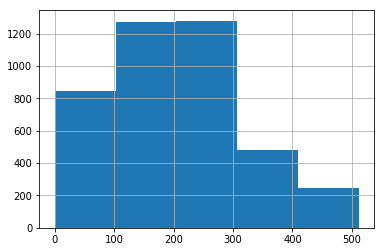

In [37]:
RFM4['Dias'].hist(bins=5)
plt.show()

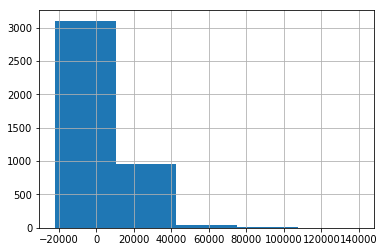

In [56]:
RFM4['Imp $'].hist(bins=5)
plt.show()

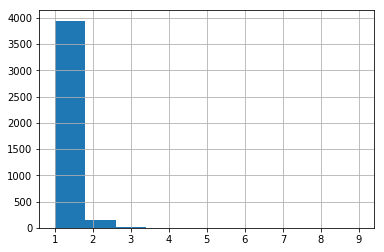

In [52]:
RFM4['Frecuencia'].hist()
plt.show()

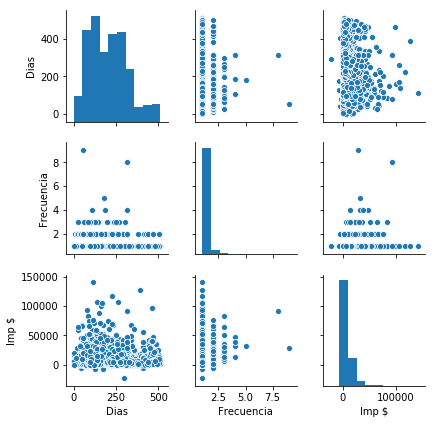

In [57]:
sb.pairplot(RFM4,height=2,vars=['Dias','Frecuencia','Imp $'],kind ='scatter')
plt.show()

In [60]:
X = np.array(RFM4[['Dias','Frecuencia','Imp $']])
X.shape

(4120, 3)

## Clusters de acuerdo a los datos crudos
### Obtener el número de clústers optimo

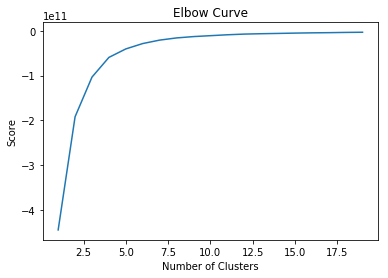

In [61]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Ejecutamos K-Means

De acuerdo a la gráfica 4 clusters es un número aceptable para agrupar clientes.

- Agrupamos a los clientes.
- Obtenemos los centroides.
- Los mostramos

In [63]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.71468750e+02 1.50000000e+00 8.11914547e+04]
 [2.01448242e+02 1.08593750e+00 1.34137425e+04]
 [2.03016949e+02 1.27966102e+00 3.24299201e+04]
 [2.08022984e+02 1.01838755e+00 4.02957495e+03]]


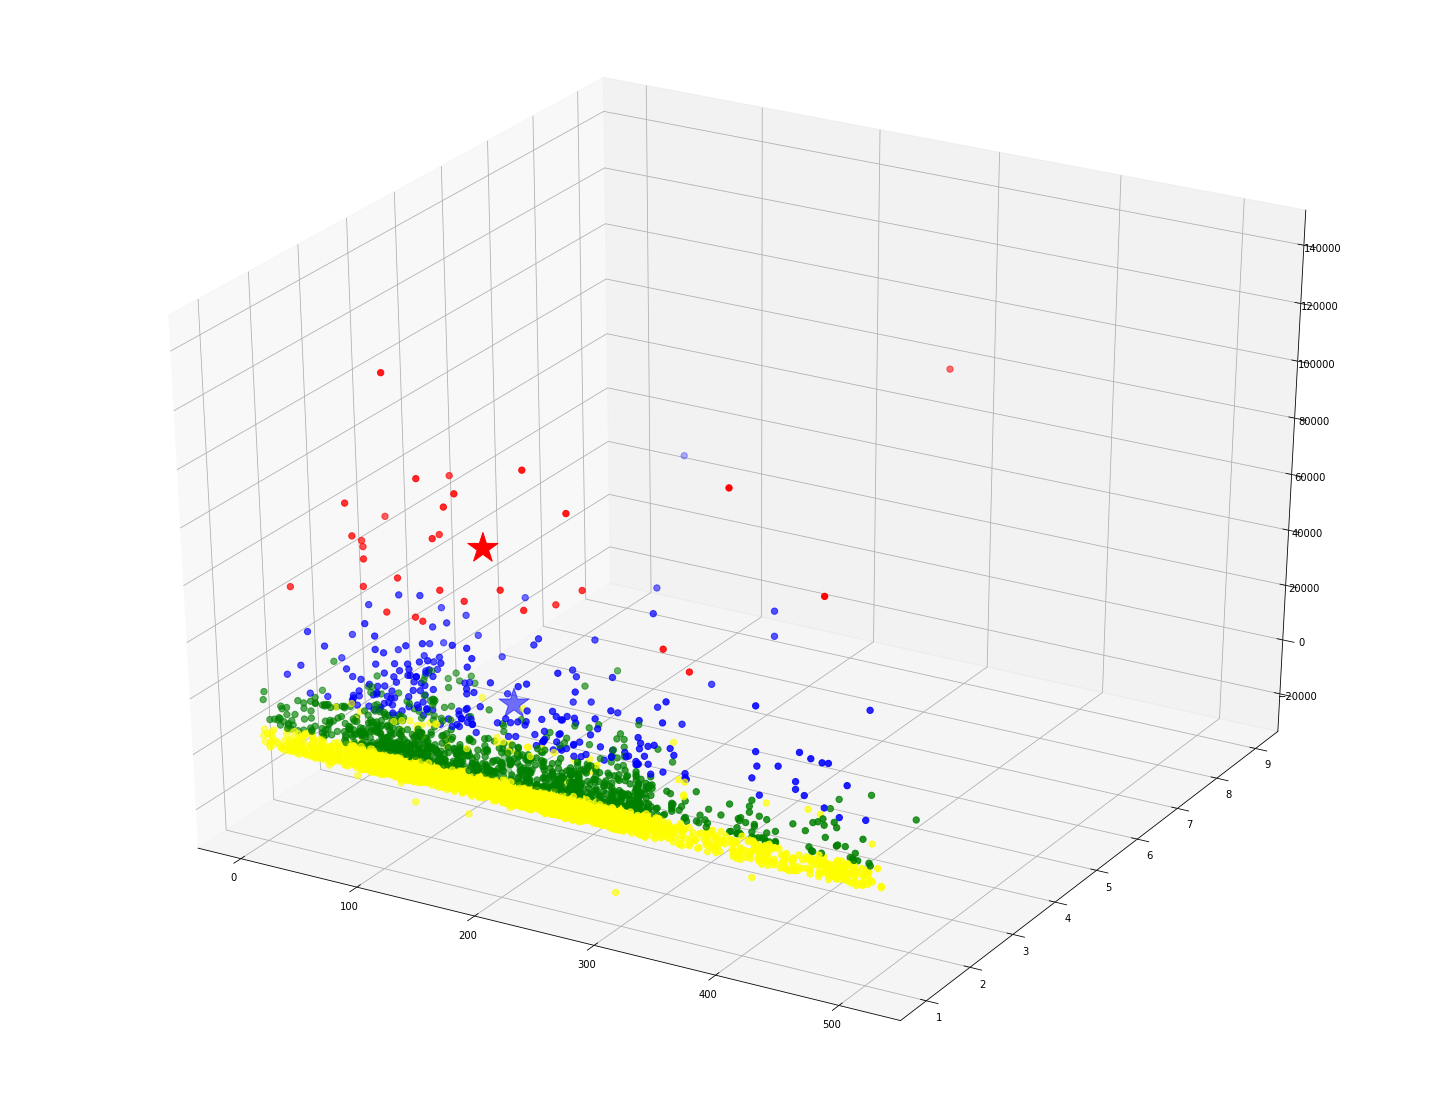

In [76]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(20,15))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=40)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

### Visualizamos cada uno de los clusters y cuántos clientes tiene

In [79]:
copy =  pd.DataFrame()
copy['id_cc']=RFM4['id_cc'].values
#copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

color  cantidad
0     red        32
1   green      1021
2    blue       235
3  yellow      2832

In [80]:
RFM5=pd.merge(RFM4,copy,on='id_cc')

In [81]:
RFM5

id_cc  Fecha_Max  Frecuencia     Imp $   Dias  \
0                         38380662 2019-04-18           1   6526.72  164.0   
1                       0122222110 2019-03-22           1  17478.45  191.0   
2                       0153610830 2019-06-07           1   2544.82  114.0   
3                       0153732657 2019-07-12           1   3300.00   79.0   
4                       0155533371 2019-06-09           1   5418.10  112.0   
5                       0155534873 2019-06-09           1    508.62  112.0   
6                       0155537419 2019-06-09           1  10331.90  112.0   
7                       0155624163 2019-06-03           1   4038.79  118.0   
8                       0158739283 2019-06-09           1   1284.48  112.0   
9                       0456391369 2019-06-24           1   4640.52   97.0   
10                      1305785871 2019-05-02           1  87625.02  150.0   
11                      1312804838 2019-03-01           1   6793.10  212.0   
12                      1955545342 2019-09-11           1  10986.20   18.0   
13                      2102596070 2019-07-08           1   2710.09   83.0   
14                      2212014623 2019-06-10           1   8762.93  111.0   
15                      2223436185 2019-03-29           1   3516.38  184.0   
16                      2225646701 2019-01-09           2  19881.03  263.0   
17                      2227719669 2018-12-16           1   8000.00  287.0   
18                      2227890511 2019-03-31           1  11455.17  182.0   
19                      2261072410 2019-02-08           1   5193.10  233.0   
20                      2299859025 2019-02-18           1  29988.80  223.0   
21                      2321248798 2018-12-15           1   4432.76  288.0   
22                      2411637336 2019-06-04           1  -1112.07  117.0   
23                      3111030032 2018-11-26           1   4519.83  307.0   
24                      3111265024 2018-10-10           1  10585.35  354.0   
25                      3112462170 2018-11-16           1   7146.55  317.0   
26                      3112601132 2019-07-07           1  28438.36   84.0   
27                      3141162633 2018-11-11           1   3142.24  322.0   
28                      3143382950 2019-01-20           1   6025.86  252.0   
29                      3172429919 2019-07-13           1   6612.07   78.0   
...                            ...        ...         ...       ...    ...   
4090            wafto.mx@gmail.com 2018-12-11           1  19125.95  292.0   
4091            xagard@hotmail.com 2019-06-29           1   2368.54   92.0   
4092           xaropos@hotmail.com 2018-12-22           1  17933.62  281.0   
4093             xfoxx@hotmail.com 2018-09-12           1   1377.59  382.0   
4094       xihomaragr@yahoo.com.mx 2019-06-08           1   9887.93  113.0   
4095    xochiltramirez30@gmail.com 2018-05-26           1   2224.14  491.0   
4096          xorubio@yahoo.com.mx 2019-06-28           1   1715.53   93.0   
4097     xrodriguezlopez@gmail.com 2019-04-19           1  15500.00  163.0   
4098            xuyglz@hotmail.com 2019-05-11           1   8392.24  141.0   
4099         yafarhomero@gmail.com 2019-01-11           2  27116.81  261.0   
4100          yairsalama@gmail.com 2019-01-18           1  34820.78  254.0   
4101     yamada0058313@yahoo.co.jp 2019-03-02           1   5804.31  211.0   
4102      yanet.gerogina@gmail.com 2019-02-21           1   1368.11  220.0   
4103         yayita_25@hotmail.com 2018-07-18           1    430.17  438.0   
4104            yepisa07@gmail.com 2019-06-23           2  22850.86   98.0   
4105      yeseniachavero@yahoo.com 2019-06-21           1   9933.62  100.0   
4106      yessicasarista@gmail.com 2018-07-22           1   1629.31  434.0   
4107          yhquiroz@hotmail.com 2018-12-25           1    853.45  278.0   
4108          yoshy_77@hotmail.com 2019-02-24           1   4821.55  217.0   
4109        yvancasanoba@gmail.com 2019-05-14      

## Clusters de acuerdo a la clasificacón RFM
### Obtención de clusters óptimos

In [42]:
A = np.array(RFM4[['R_class','F_class','M_class']])
A.shape

(4120, 3)

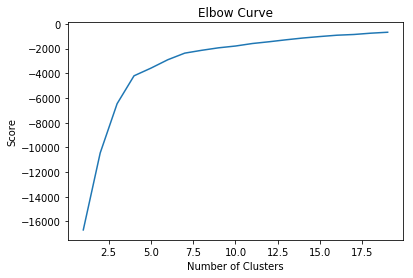

In [43]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(A).score(A) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=4).fit(A)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.34947183 1.01760563 2.11971831]
 [1.48938322 1.04651163 3.97067745]
 [3.94721116 1.11055777 4.50697211]
 [2.02320888 1.00908174 1.51967709]]


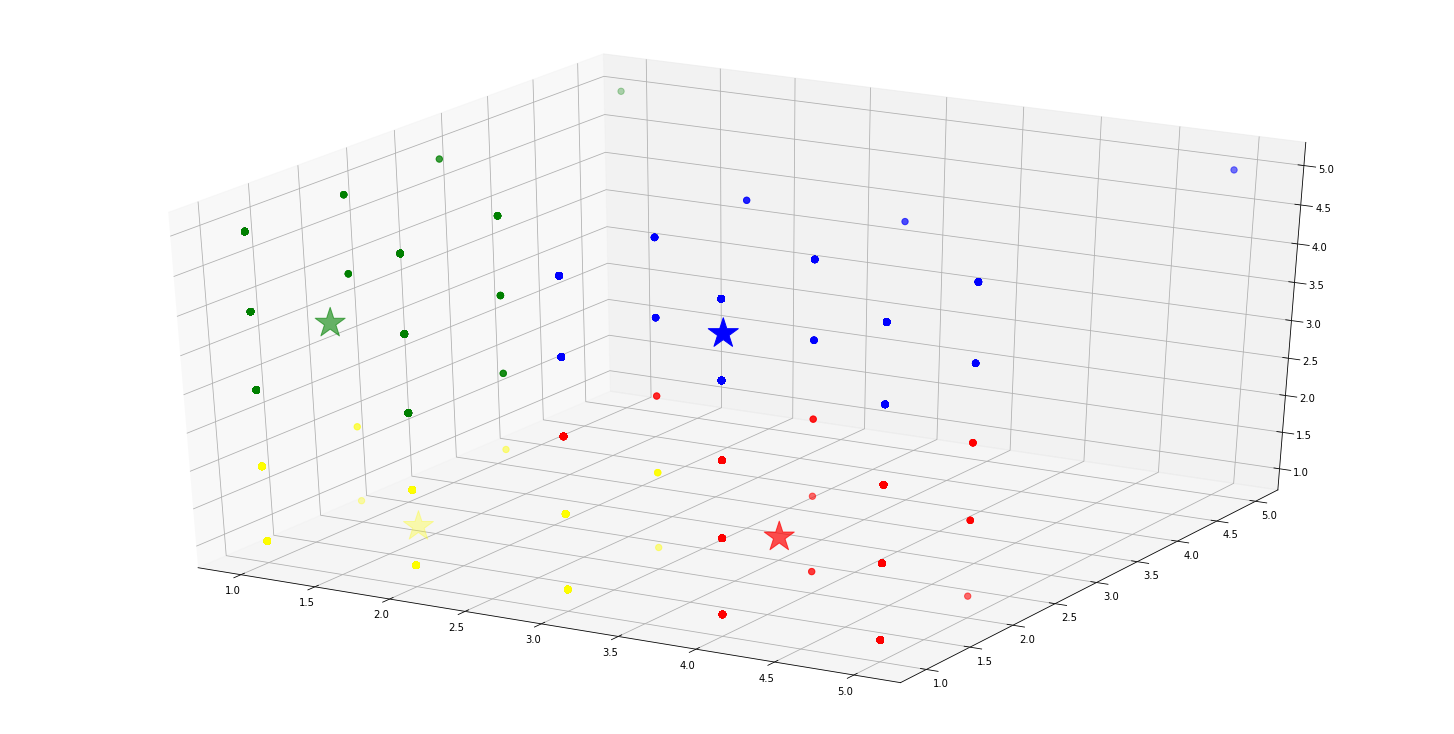

In [46]:
# Predicting the clusters
labels = kmeans.predict(A)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c=asignar,s=40)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [47]:
copia =  pd.DataFrame()
copia['id_cc']=RFM4['id_cc'].values
#copy['categoria']=dataframe['categoria'].values
copia['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copia.groupby('label').size()
cantidadGrupo

color  cantidad
0     red      1136
1   green       989
2    blue      1004
3  yellow       991

In [49]:
RFM6=pd.merge(RFM4,copia,on='id_cc')

In [50]:
RFM6

id_cc  Fecha_Max  Frecuencia     Imp $   Dias  \
0                         38380662 2019-04-18           1   6526.72  164.0   
1                       0122222110 2019-03-22           1  17478.45  191.0   
2                       0153610830 2019-06-07           1   2544.82  114.0   
3                       0153732657 2019-07-12           1   3300.00   79.0   
4                       0155533371 2019-06-09           1   5418.10  112.0   
5                       0155534873 2019-06-09           1    508.62  112.0   
6                       0155537419 2019-06-09           1  10331.90  112.0   
7                       0155624163 2019-06-03           1   4038.79  118.0   
8                       0158739283 2019-06-09           1   1284.48  112.0   
9                       0456391369 2019-06-24           1   4640.52   97.0   
10                      1305785871 2019-05-02           1  87625.02  150.0   
11                      1312804838 2019-03-01           1   6793.10  212.0   
12                      1955545342 2019-09-11           1  10986.20   18.0   
13                      2102596070 2019-07-08           1   2710.09   83.0   
14                      2212014623 2019-06-10           1   8762.93  111.0   
15                      2223436185 2019-03-29           1   3516.38  184.0   
16                      2225646701 2019-01-09           2  19881.03  263.0   
17                      2227719669 2018-12-16           1   8000.00  287.0   
18                      2227890511 2019-03-31           1  11455.17  182.0   
19                      2261072410 2019-02-08           1   5193.10  233.0   
20                      2299859025 2019-02-18           1  29988.80  223.0   
21                      2321248798 2018-12-15           1   4432.76  288.0   
22                      2411637336 2019-06-04           1  -1112.07  117.0   
23                      3111030032 2018-11-26           1   4519.83  307.0   
24                      3111265024 2018-10-10           1  10585.35  354.0   
25                      3112462170 2018-11-16           1   7146.55  317.0   
26                      3112601132 2019-07-07           1  28438.36   84.0   
27                      3141162633 2018-11-11           1   3142.24  322.0   
28                      3143382950 2019-01-20           1   6025.86  252.0   
29                      3172429919 2019-07-13           1   6612.07   78.0   
...                            ...        ...         ...       ...    ...   
4090            wafto.mx@gmail.com 2018-12-11           1  19125.95  292.0   
4091            xagard@hotmail.com 2019-06-29           1   2368.54   92.0   
4092           xaropos@hotmail.com 2018-12-22           1  17933.62  281.0   
4093             xfoxx@hotmail.com 2018-09-12           1   1377.59  382.0   
4094       xihomaragr@yahoo.com.mx 2019-06-08           1   9887.93  113.0   
4095    xochiltramirez30@gmail.com 2018-05-26           1   2224.14  491.0   
4096          xorubio@yahoo.com.mx 2019-06-28           1   1715.53   93.0   
4097     xrodriguezlopez@gmail.com 2019-04-19           1  15500.00  163.0   
4098            xuyglz@hotmail.com 2019-05-11           1   8392.24  141.0   
4099         yafarhomero@gmail.com 2019-01-11           2  27116.81  261.0   
4100          yairsalama@gmail.com 2019-01-18           1  34820.78  254.0   
4101     yamada0058313@yahoo.co.jp 2019-03-02           1   5804.31  211.0   
4102      yanet.gerogina@gmail.com 2019-02-21           1   1368.11  220.0   
4103         yayita_25@hotmail.com 2018-07-18           1    430.17  438.0   
4104            yepisa07@gmail.com 2019-06-23           2  22850.86   98.0   
4105      yeseniachavero@yahoo.com 2019-06-21           1   9933.62  100.0   
4106      yessicasarista@gmail.com 2018-07-22           1   1629.31  434.0   
4107          yhquiroz@hotmail.com 2018-12-25           1    853.45  278.0   
4108          yoshy_77@hotmail.com 2019-02-24           1   4821.55  217.0   
4109        yvancasanoba@gmail.com 2019-05-14      

In [51]:
RFM6.to_excel('ClassClientesClustersRFM.xlsx',index=False) 